In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import cv2
%matplotlib inline

In [2]:
sns.set(style="darkgrid")
plt.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.figsize'] = (10, 10)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/MyDrive/JSWut'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Helper functions used for plotting

In [4]:
def load_image(js_file):
    max_res = 256 * 256
    data = np.fromfile(js_file, dtype=np.uint8)
    times = int(np.ceil(max_res/len(data)))
    data = np.tile(data, times)[:max_res]
    data = data.reshape(256, 256)
    return data

In [5]:
def get_js_image(js_file, v2=False, max_plots=10):
  if not v2:
    data = load_image(js_file)
    plt.imshow(data)
    plt.show()
  else:
    fig, axs = plt.subplots(max_plots, 5, figsize=(20, 20), facecolor='w', edgecolor='k')
    # fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    
    for i, file in enumerate(js_file[:max_plots * 5]):
      axs[i].imshow(load_image(file))
      # axs[i].set_title(file.split('/')[-1])
      axs[i].set_title(i)
      axs[i].set_axis_off()
    plt.gray()
    plt.grid(b=None)

In [6]:
def plot_metrics(data, metric ='F1-Score', skips=[], hide_x=False, annotate=False):
  avail_metrics = [
                   "Accuracy", "F1-Score",
                   "False Discovery Rate", "False Negative Rate",
                   "False Positive Rate", "Matthews Correlation Coefficient",
                   "Negative Predictive Value", "Precision",
                   "Sensitivity", "Specificity"
    ]
  if metric not in avail_metrics:
    raise ValueError(f'Metric has to be one of {avail_metrics}')
  w = 0.5
  x_ticks = []
  # x = np.array(range(6))
  fig, ax = plt.subplots()
  colors = 'rbcymgk'
  # x = x - (2 * w)
  x = 0
  i = 0
  plt.grid(False)
  for model in data.keys():
    if model in skips:
      continue
    ax.bar(x, data[model][metric], width=w, color=colors[i], align='center', label=model)
    x += (2 * w)
    i += 1
    x_ticks.append(model)
  if annotate:
    for rect in ax.patches:
        bar_height = rect.get_height()
        if bar_height == 0:
            continue     
        ax.annotate(f'{bar_height * 100:.5f}%',
                    xy=(rect.get_x() + rect.get_width() / 3, bar_height),
                    xytext=(10, 3), fontsize=8,
                    textcoords="offset points", rotation=0.0,
                    ha='center', va='bottom')
  ax.set_ylabel(f'{metric}');  
  ax.set_xticks(range(len(x_ticks)))
  ax.set_xticklabels(x_ticks)
  if hide_x:
    plt.xticks([])    
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  ax.set_title(f'{metric} of different models used');  

#File visualization

In [7]:
files = [f for f in glob.glob(directory + f"*/*/*.img", recursive=True) if os.path.isfile(f)]

In [8]:
mal_files = [file for file in files if 'malicious' in file]
ben_files = [file for file in files if 'benign' in file]

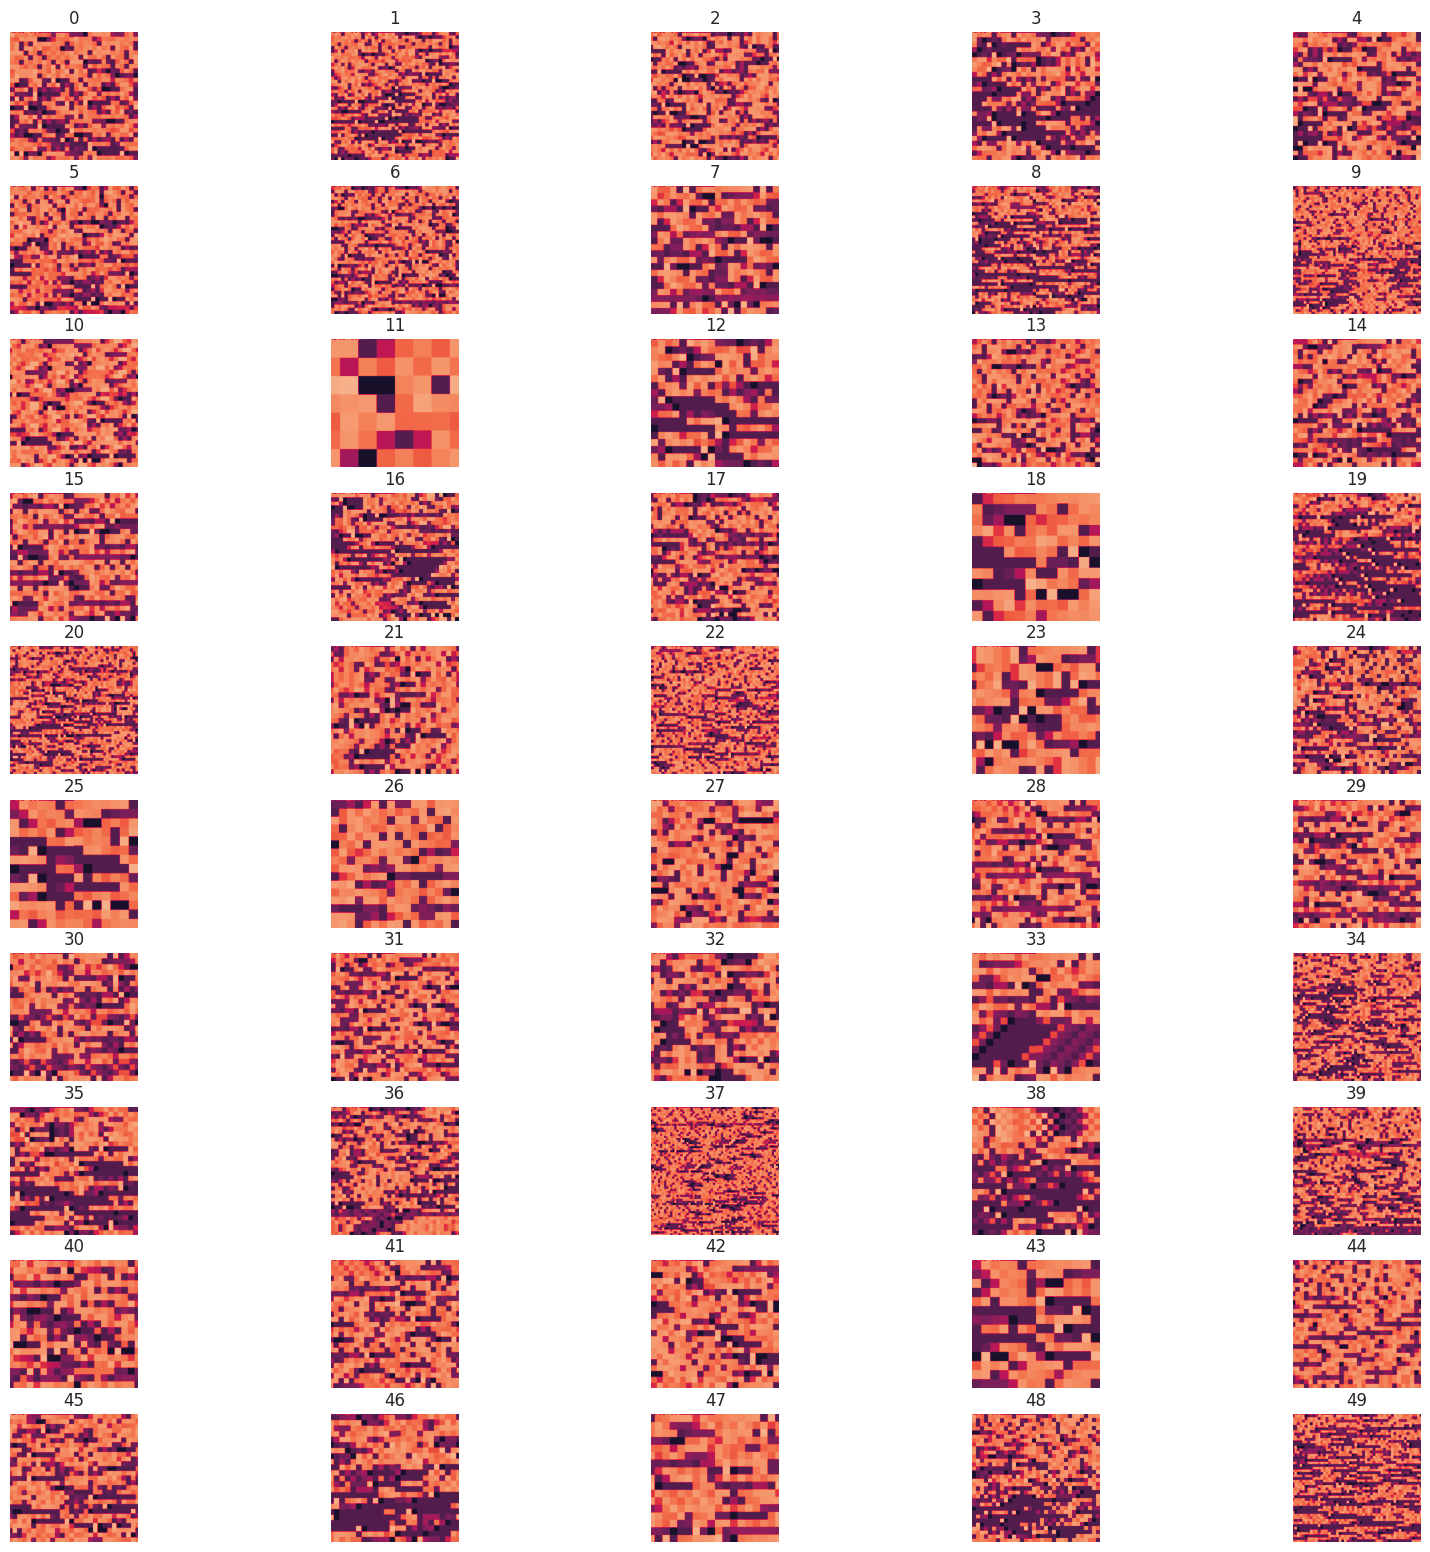

In [9]:
get_js_image(ben_files[100:], v2=True)

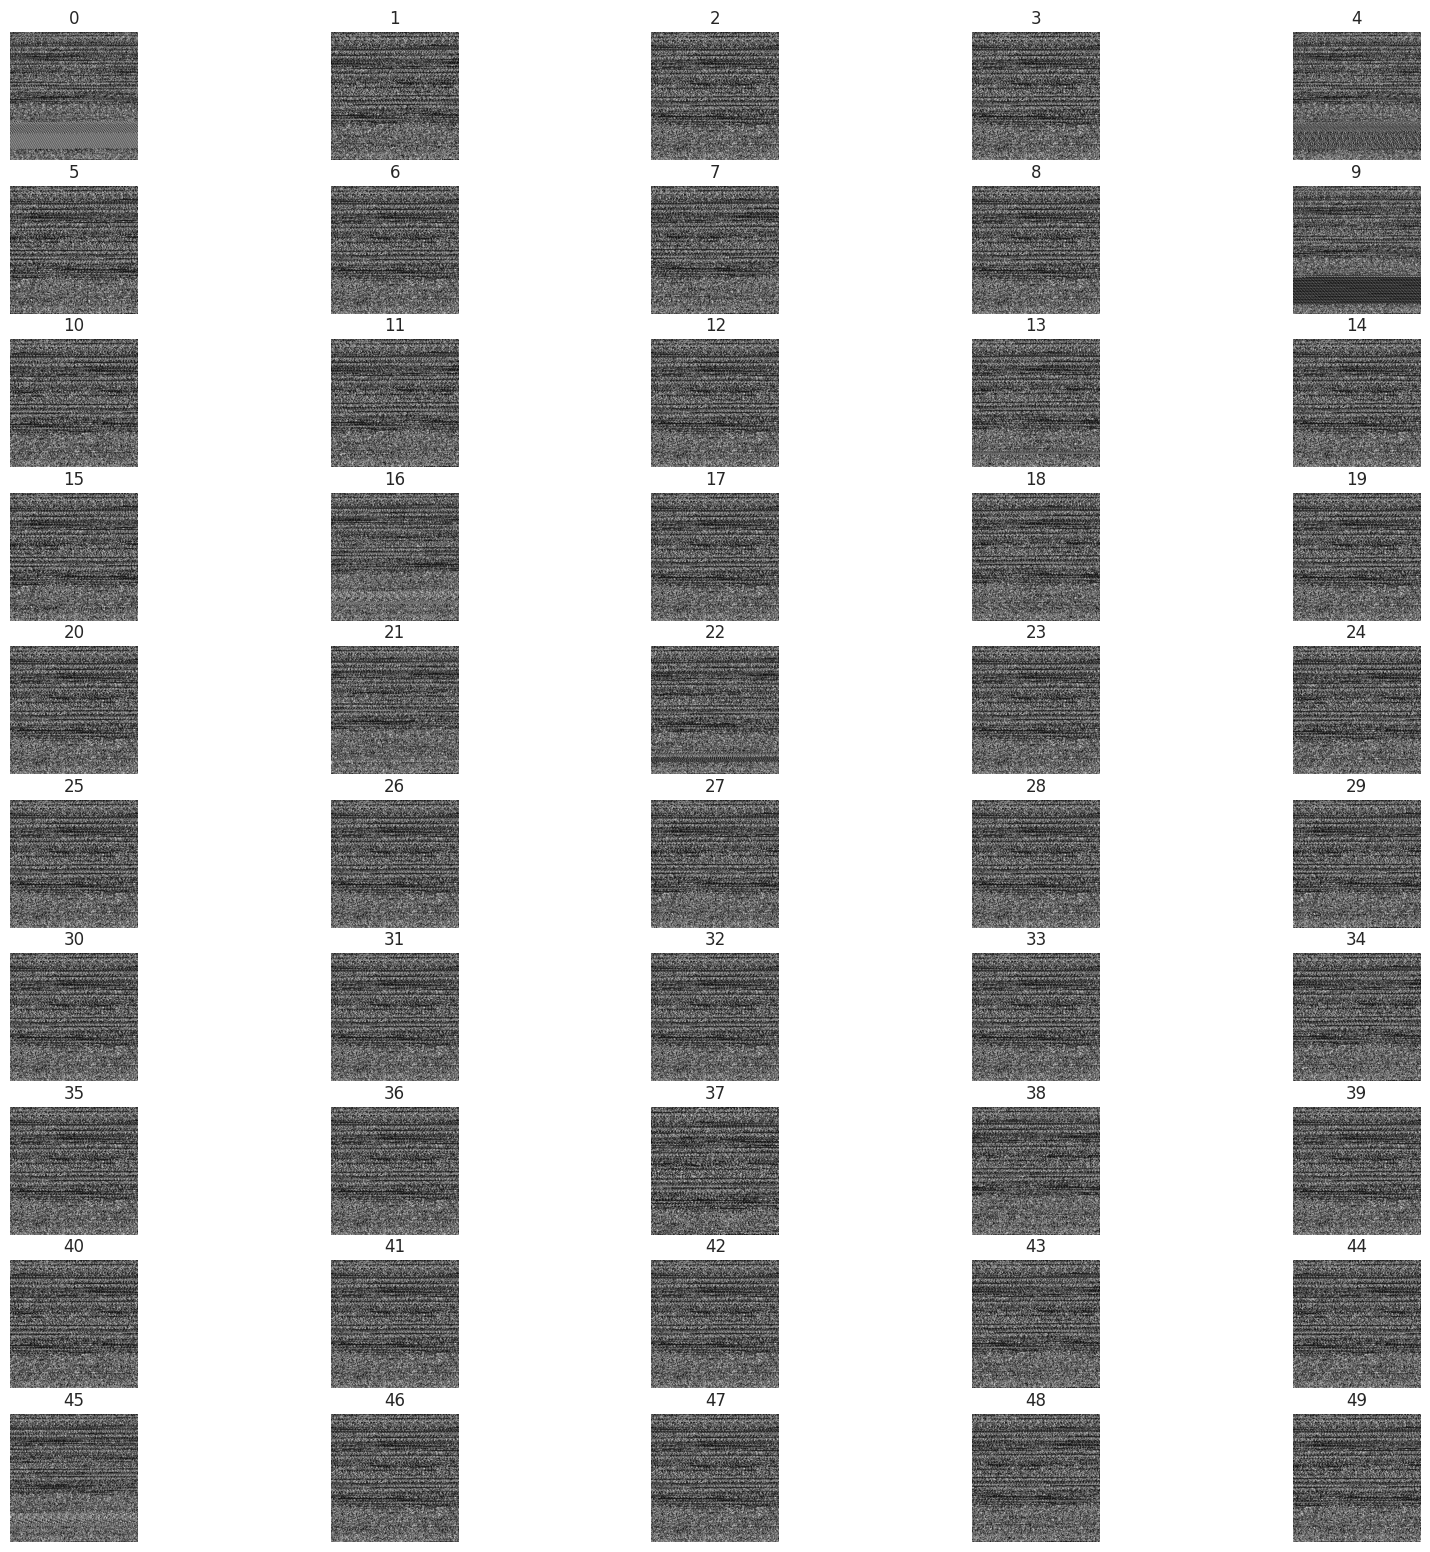

In [10]:
get_js_image(mal_files[100:], v2=True)

# Our Model metrics

In [11]:
js_file_only = {
    "Accuracy": 0.9261447562776958,
    "F1-Score": 0.9552772808586762,
    "False Discovery Rate": 0.08089500860585198,
    "False Negative Rate": 0.00558659217877095,
    "False Positive Rate": 0.3357142857142857,
    "Matthews Correlation Coefficient": 0.7647413310326525,
    "Negative Predictive Value": 0.96875,
    "Precision": 0.919104991394148,
    "Sensitivity": 0.994413407821229,
    "Specificity": 0.6642857142857143
}

In [12]:
js_bytecode_only = {
    "Accuracy": 0.9778434268833087,
    "F1-Score": 0.9858889934148636,
    "False Discovery Rate": 0.0056925996204933585,
    "False Negative Rate": 0.022388059701492536,
    "False Positive Rate": 0.02127659574468085,
    "Matthews Correlation Coefficient": 0.9350852810145441,
    "Negative Predictive Value": 0.92,
    "Precision": 0.9943074003795066,
    "Sensitivity": 0.9776119402985075,
    "Specificity": 0.9787234042553191
}

In [13]:
js_file_bal = {
    "Accuracy": 0.8022426095820592,
    "F1-Score": 0.8452950558213717,
    "False Discovery Rate": 0.26795580110497236,
    "False Negative Rate": 0.0,
    "False Positive Rate": 0.43015521064301554,
    "Matthews Correlation Coefficient": 0.6458727214547302,
    "Negative Predictive Value": 1.0,
    "Precision": 0.7320441988950276,
    "Sensitivity": 1.0,
    "Specificity": 0.5698447893569845
}

In [14]:
js_bytecode_bal = {
    "Accuracy": 0.9663608562691132,
    "F1-Score": 0.9681774349083896,
    "False Discovery Rate": 0.01761252446183953,
    "False Negative Rate": 0.045627376425855515,
    "False Positive Rate": 0.01978021978021978,
    "Matthews Correlation Coefficient": 0.9329565931984617,
    "Negative Predictive Value": 0.948936170212766,
    "Precision": 0.9823874755381604,
    "Sensitivity": 0.9543726235741445,
    "Specificity": 0.9802197802197802
}

# Pre-trained Model Metrics

In [15]:
js_bytecode_inceptV3 = {
    "Accuracy": 0.9785932721712538,
    "F1-Score": 0.9798270893371758,
    "False Discovery Rate": 0.009708737864077669,
    "False Negative Rate": 0.030418250950570342,
    "False Positive Rate": 0.01098901098901099,
    "Matthews Correlation Coefficient": 0.9572737106304199,
    "Negative Predictive Value": 0.9656652360515021,
    "Precision": 0.9902912621359223,
    "Sensitivity": 0.9695817490494296,
    "Specificity": 0.989010989010989
}

In [16]:
js_bytecode_res50 = {
    "Accuracy": 0.9765545361875637,
    "F1-Score": 0.9778206364513018,
    "False Discovery Rate": 0.007827788649706457,
    "False Negative Rate": 0.03612167300380228,
    "False Positive Rate": 0.008791208791208791,
    "Matthews Correlation Coefficient": 0.9534154358531874,
    "Negative Predictive Value": 0.9595744680851064,
    "Precision": 0.9921722113502935,
    "Sensitivity": 0.9638783269961977,
    "Specificity": 0.9912087912087912
}

In [17]:
js_bytecode_vgg16 = {
    "Accuracy": 0.9877675840978594,
    "F1-Score": 0.9887005649717514,
    "False Discovery Rate": 0.020522388059701493,
    "False Negative Rate": 0.0019011406844106464,
    "False Positive Rate": 0.024175824175824177,
    "Matthews Correlation Coefficient": 0.975575326452111,
    "Negative Predictive Value": 0.9977528089887641,
    "Precision": 0.9794776119402985,
    "Sensitivity": 0.9980988593155894,
    "Specificity": 0.9758241758241758
}

In [18]:
all_model_metrics = {
    # Bytecode with balancing
    'VGG16': js_bytecode_vgg16,
    'ResNet50': js_bytecode_res50,
    'InceptionV3': js_bytecode_inceptV3,
    'Our Model': js_bytecode_bal,
    # Other trials
    'Our Model (Raw JS)': js_file_bal,
    'Our Model (Raw JS + No balance)': js_file_only,
    'Our Model (Bytecode + No balance)': js_bytecode_only
}

In [19]:
df_metrics = pd.DataFrame(all_model_metrics)
df_metrics

VGG16  ...  Our Model (Bytecode + No balance)
Accuracy                          0.987768  ...                           0.977843
F1-Score                          0.988701  ...                           0.985889
False Discovery Rate              0.020522  ...                           0.005693
False Negative Rate               0.001901  ...                           0.022388
False Positive Rate               0.024176  ...                           0.021277
Matthews Correlation Coefficient  0.975575  ...                           0.935085
Negative Predictive Value         0.997753  ...                           0.920000
Precision                         0.979478  ...                           0.994307
Sensitivity                       0.998099  ...                           0.977612
Specificity                       0.975824  ...                           0.978723

[10 rows x 7 columns]

In [20]:
metrics = [
           "Accuracy", "F1-Score",
           "False Discovery Rate", "False Negative Rate",
           "False Positive Rate", "Matthews Correlation Coefficient",
           "Negative Predictive Value", "Precision",
           "Sensitivity", "Specificity"]

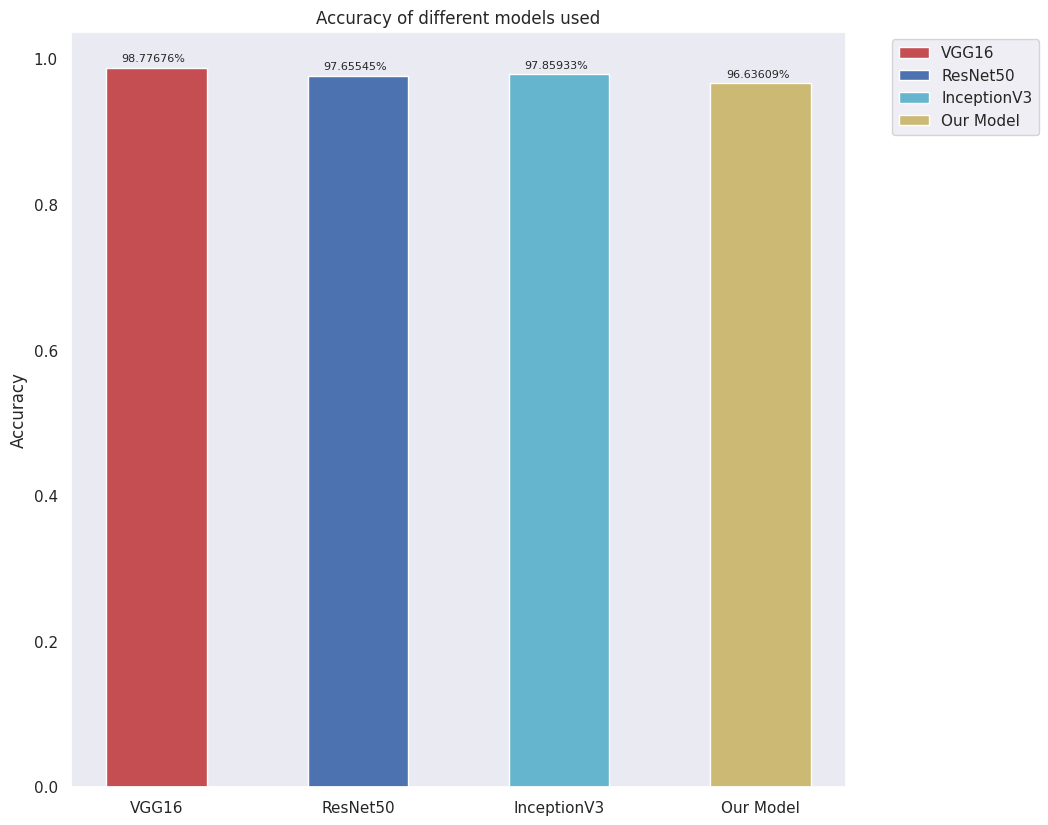

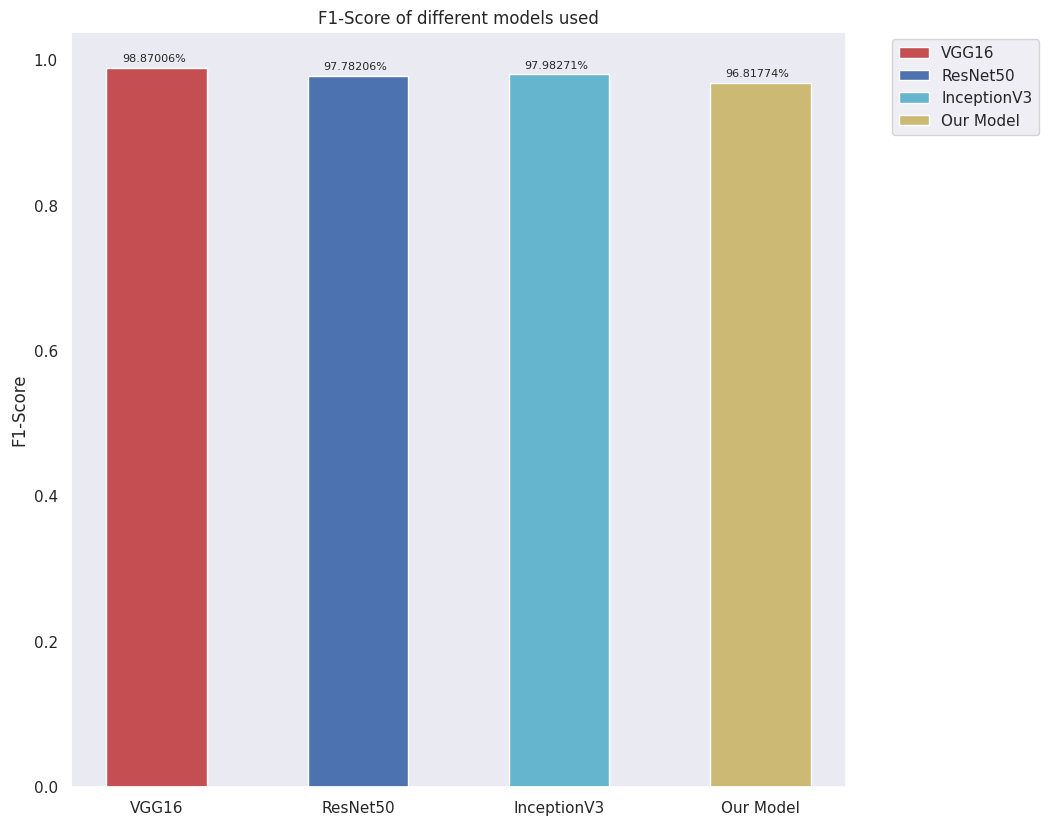

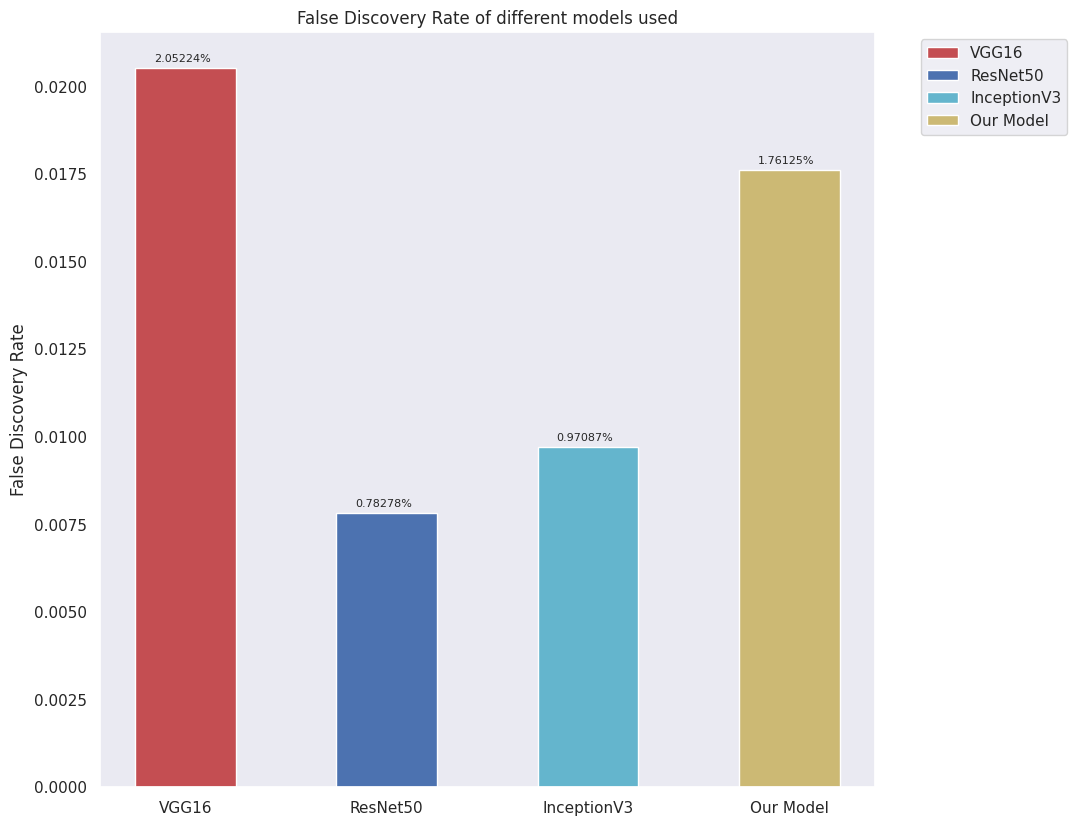

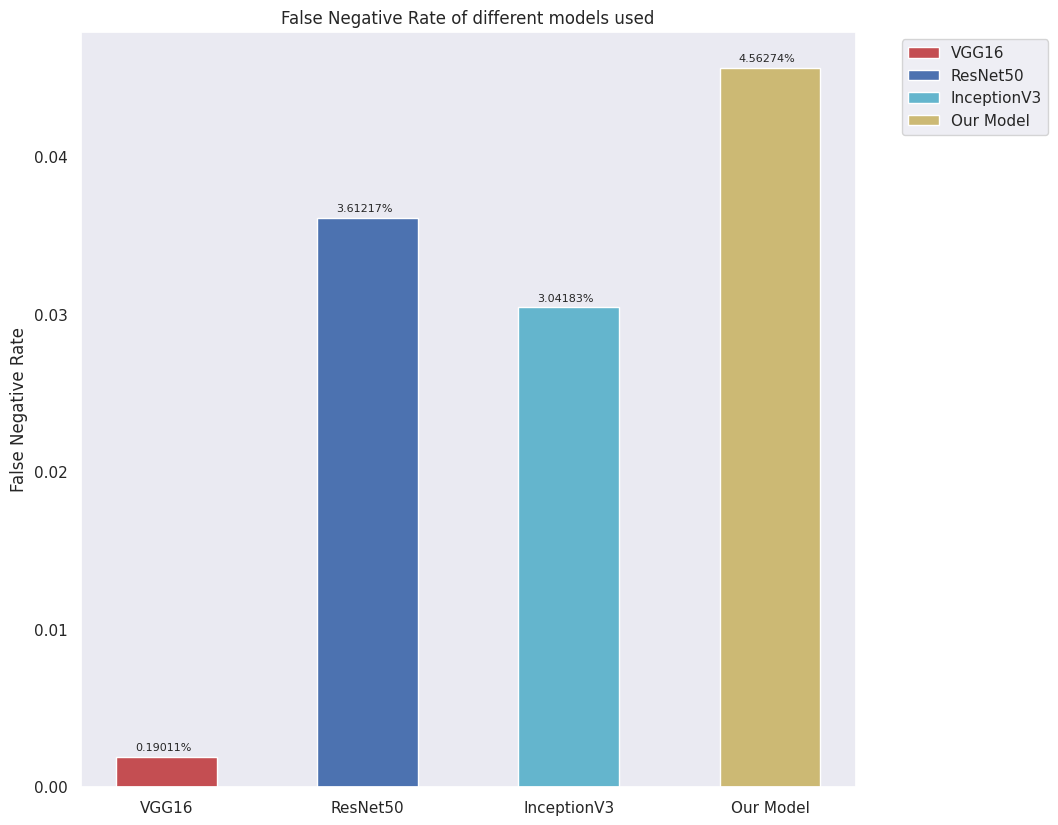

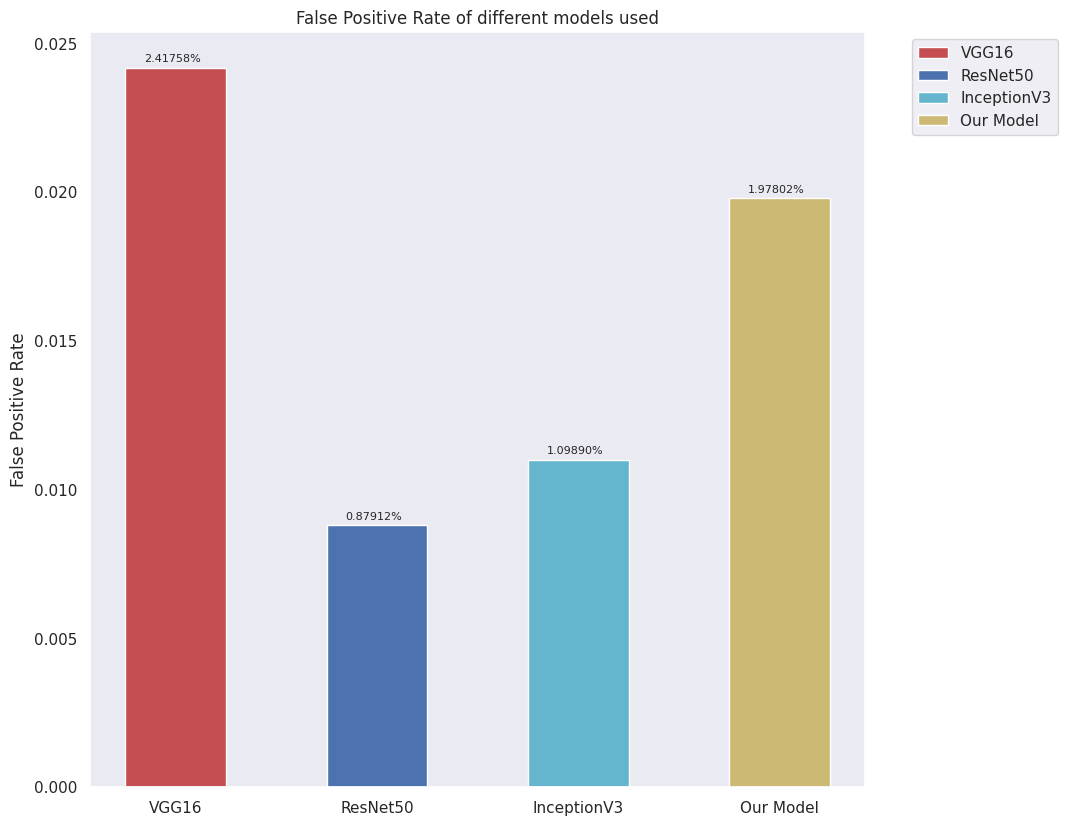

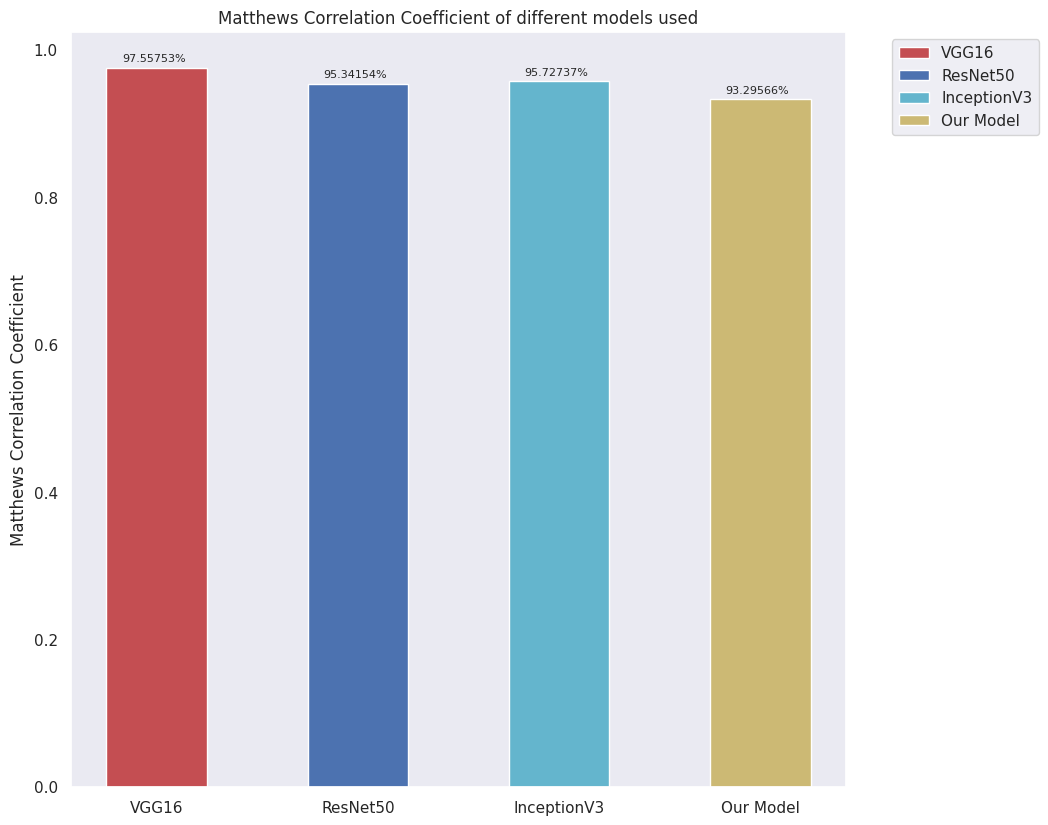

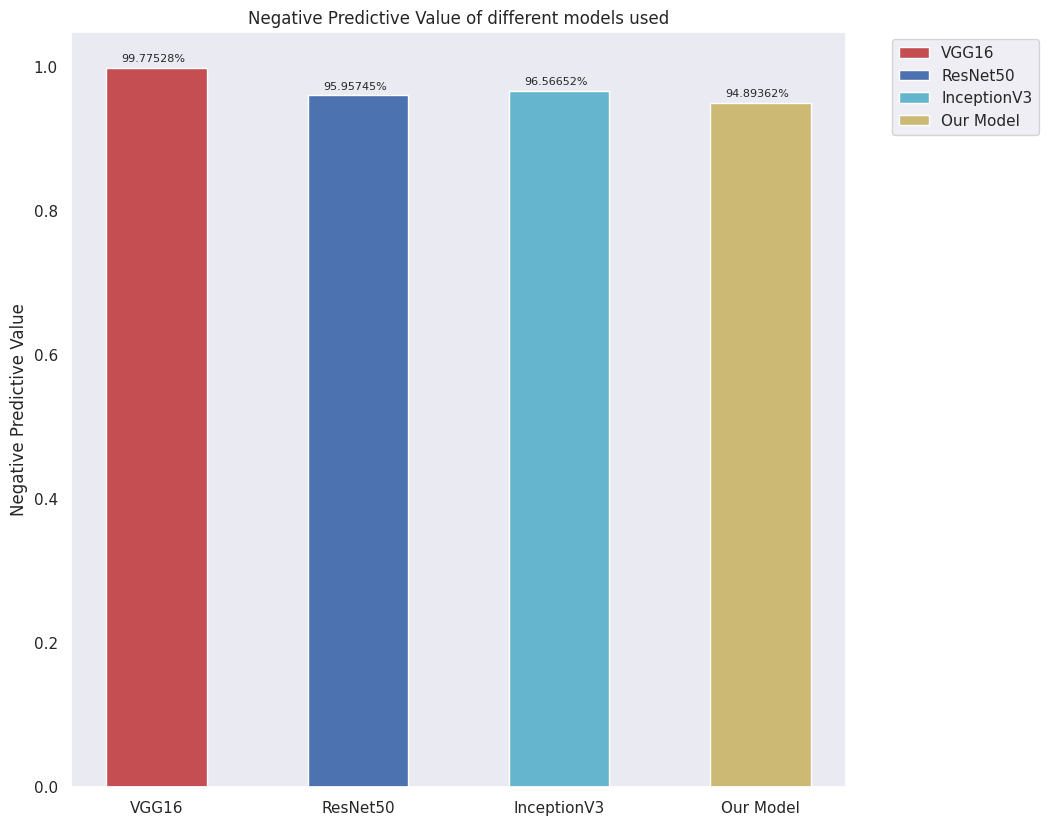

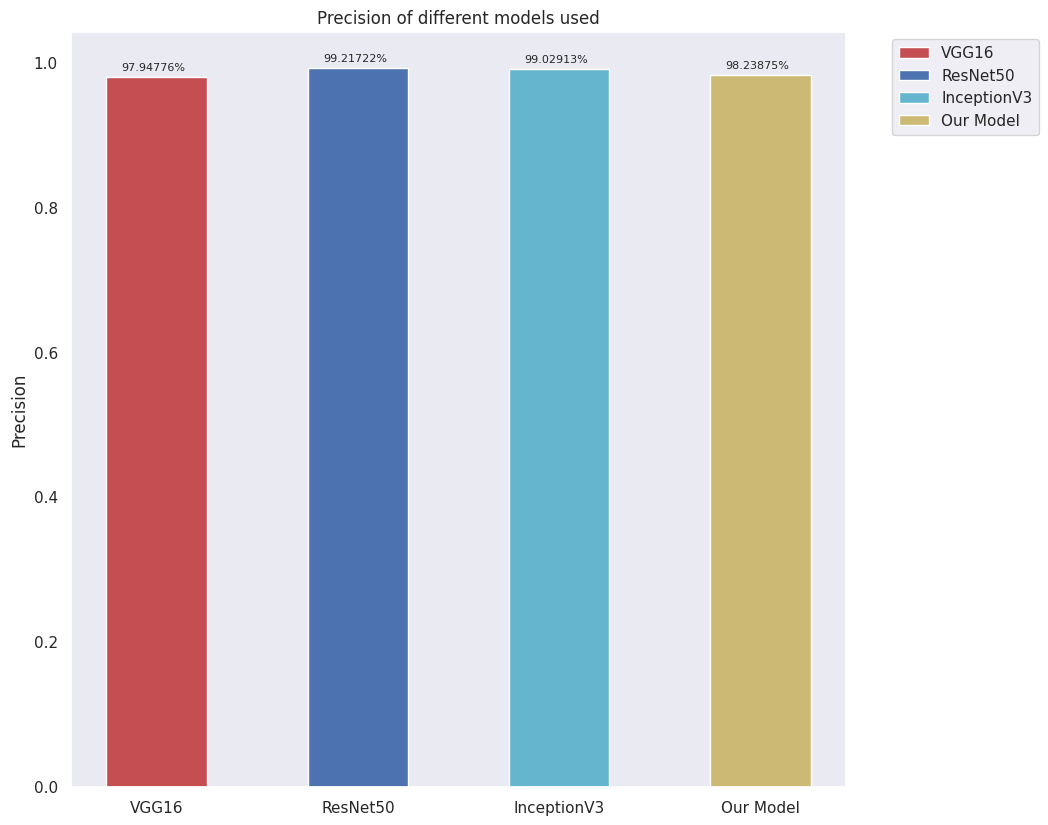

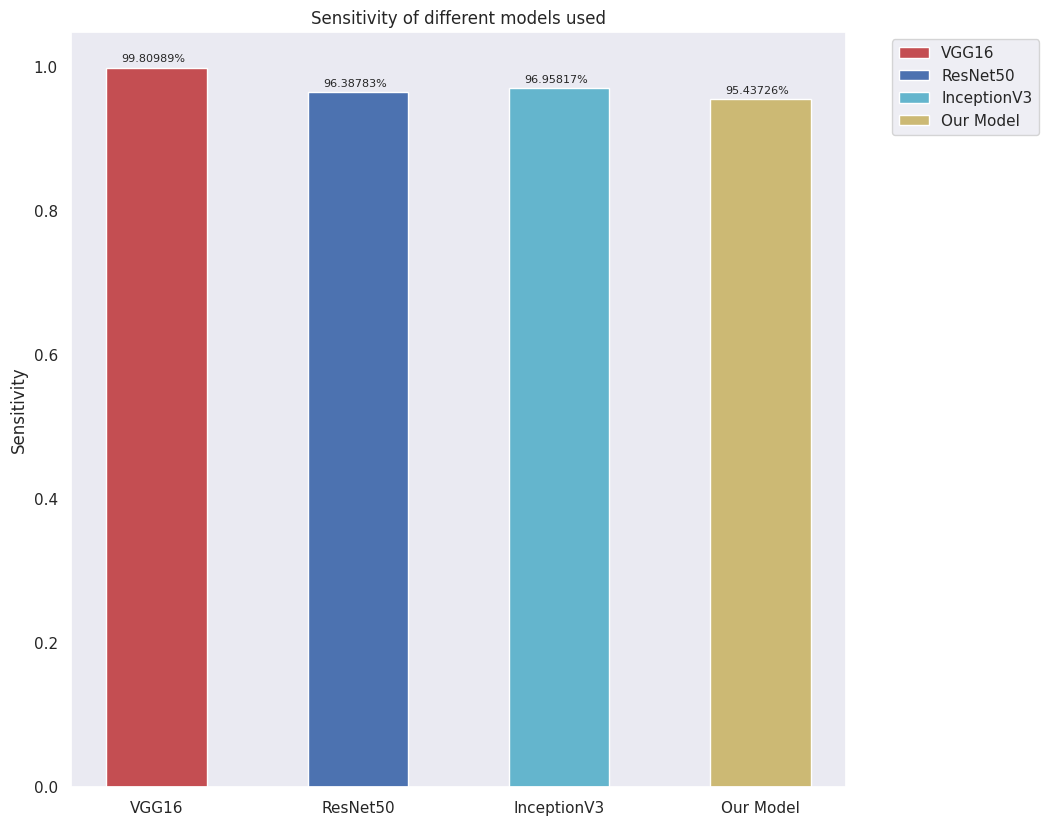

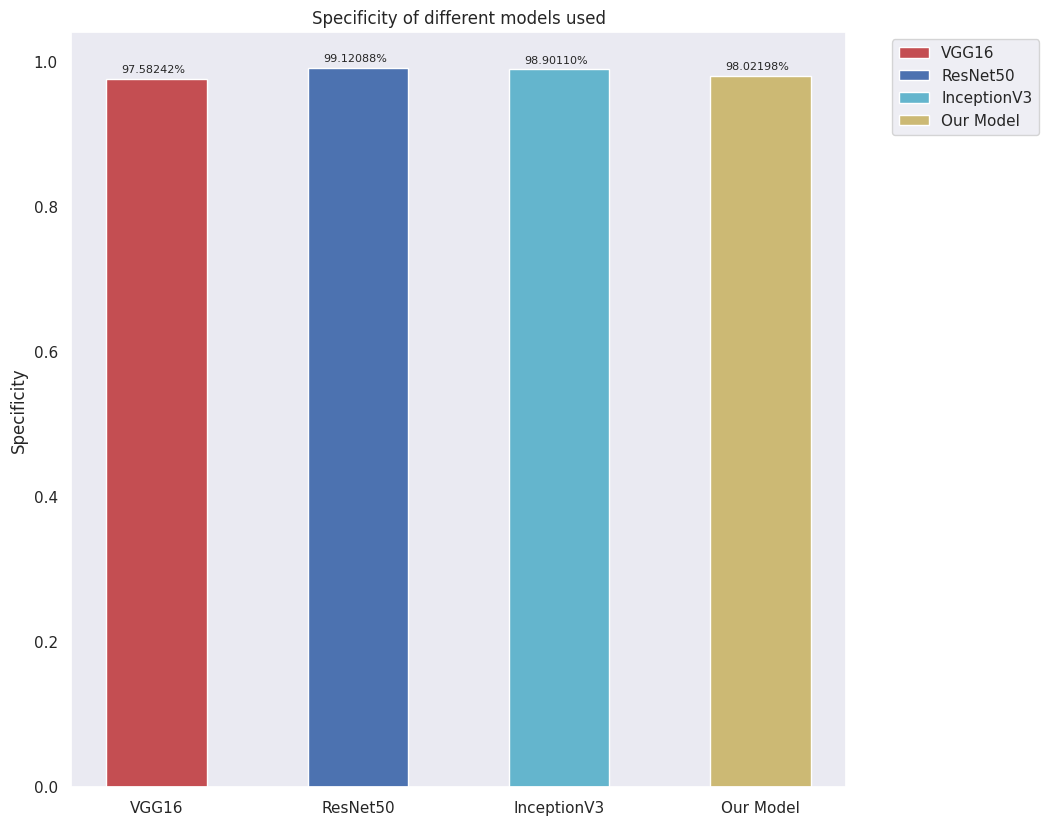

In [21]:
for metric in metrics:
  plot_metrics(all_model_metrics, metric=metric, skips=["Our Model (Raw JS)", "Our Model (Raw JS + No balance)", "Our Model (Bytecode + No balance)"], annotate=True)

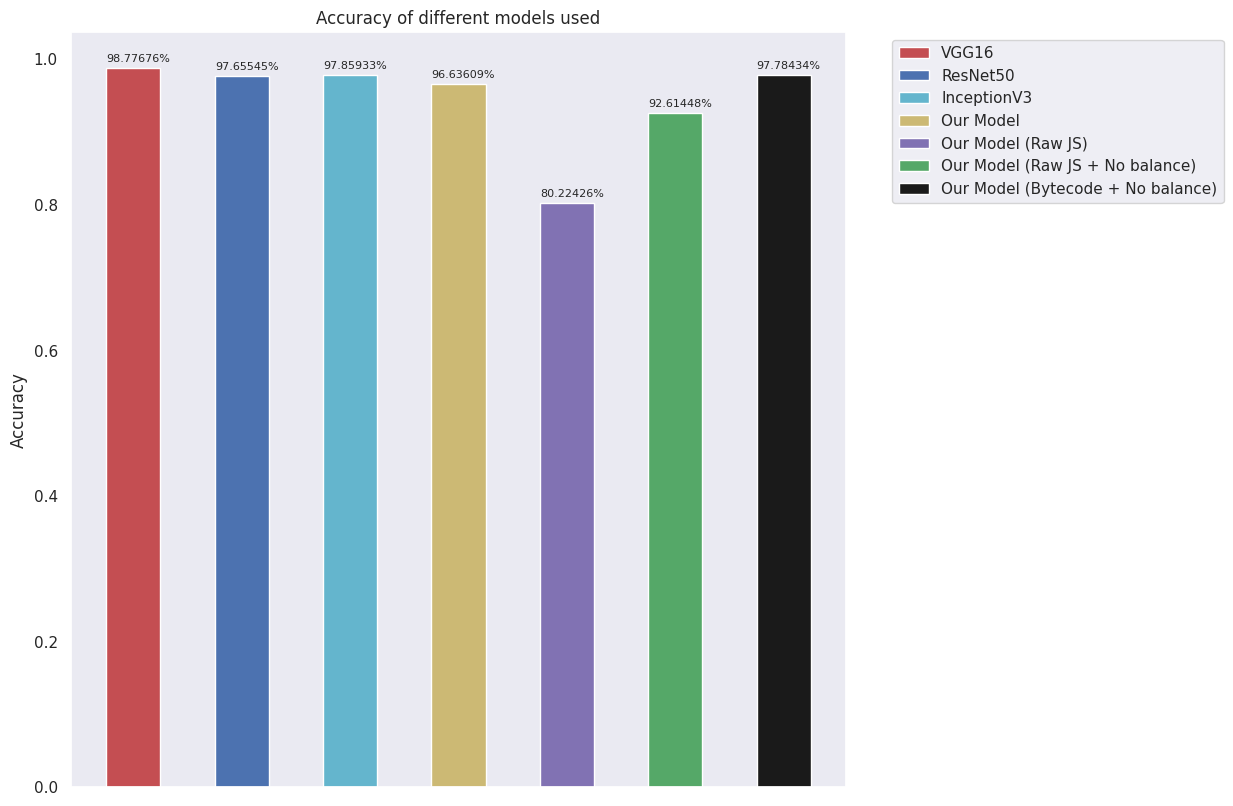

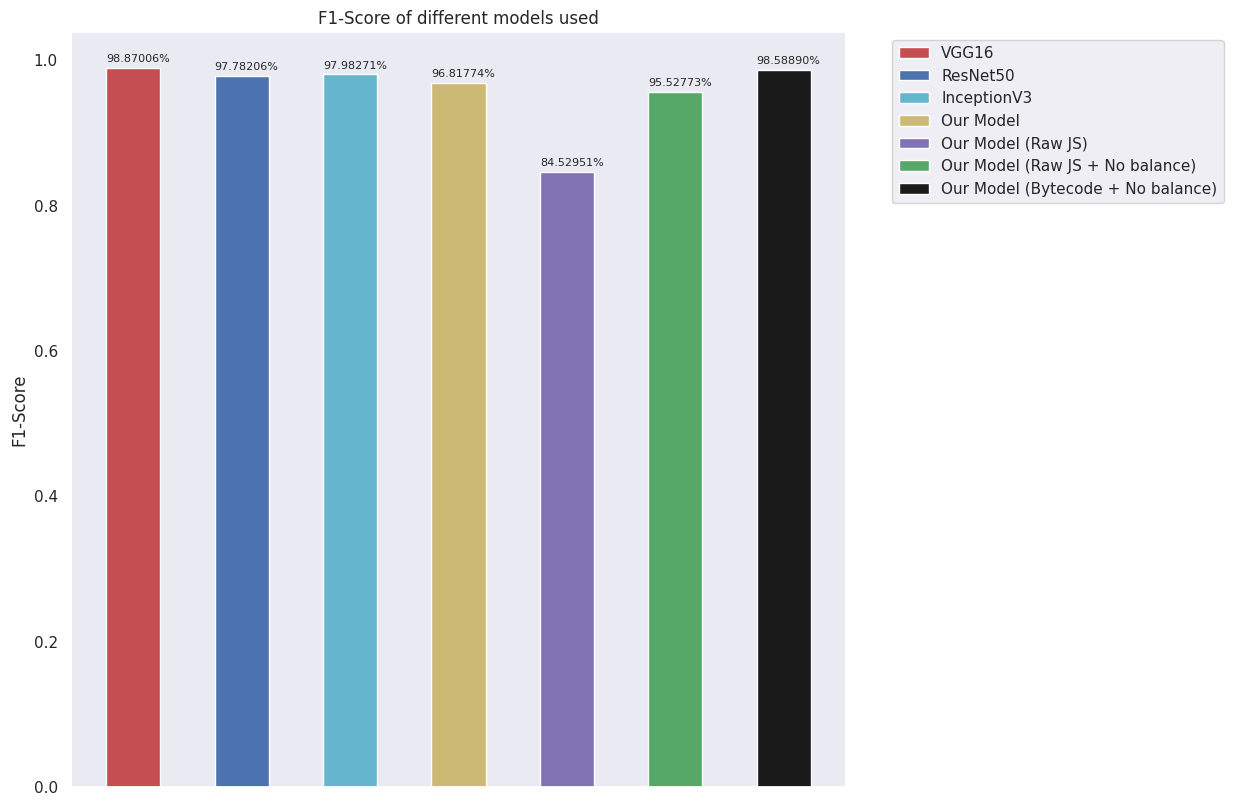

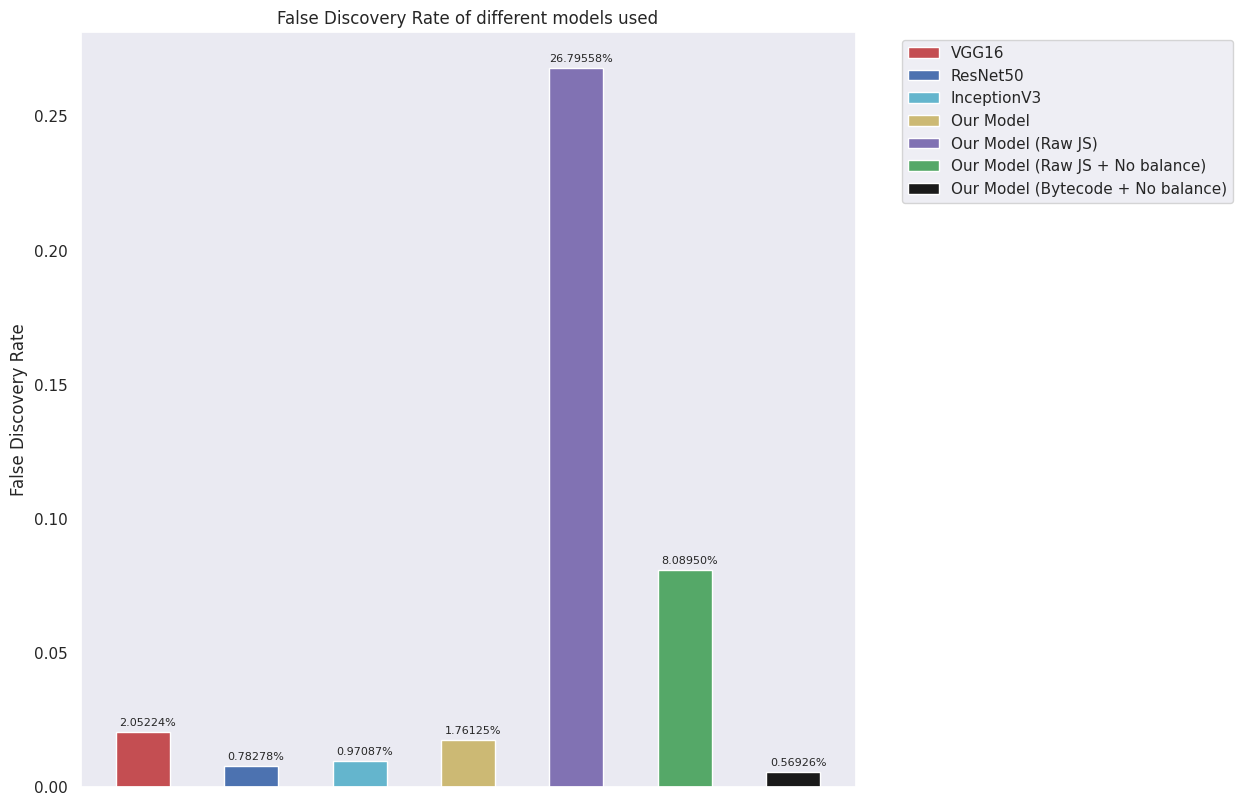

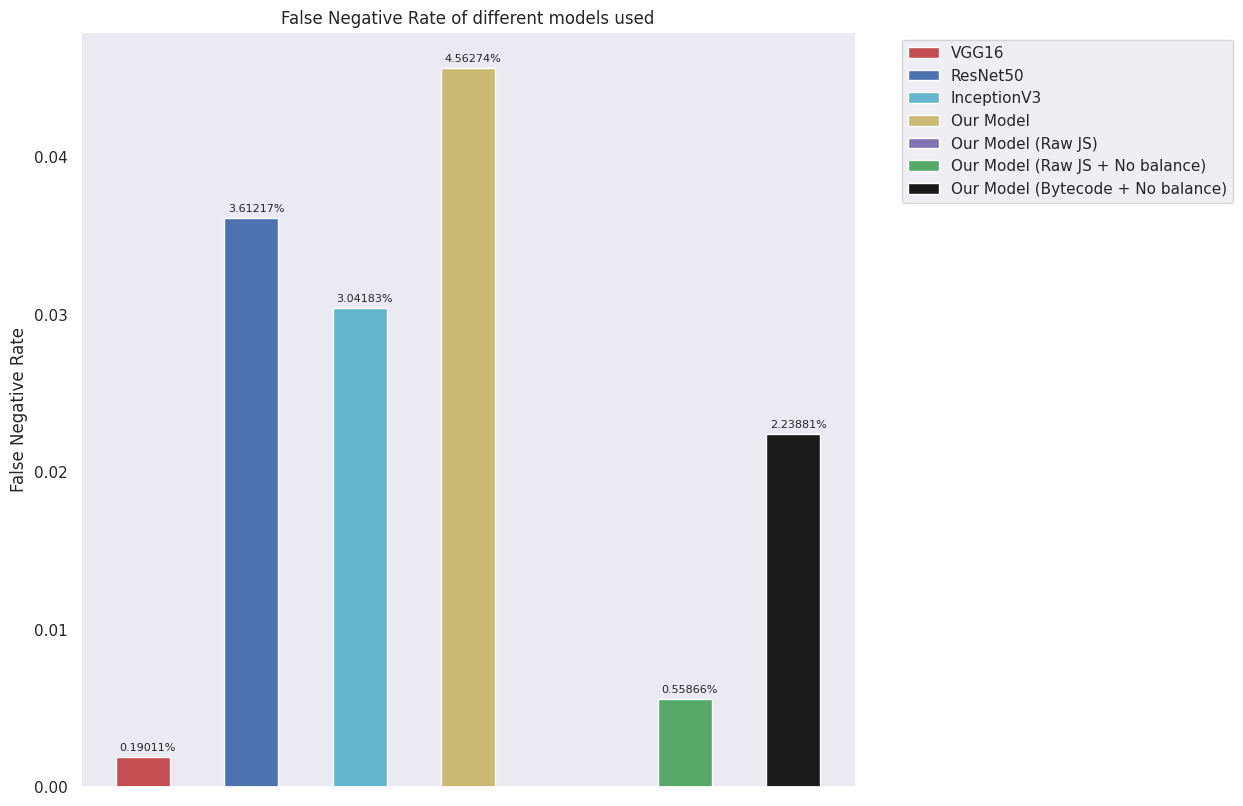

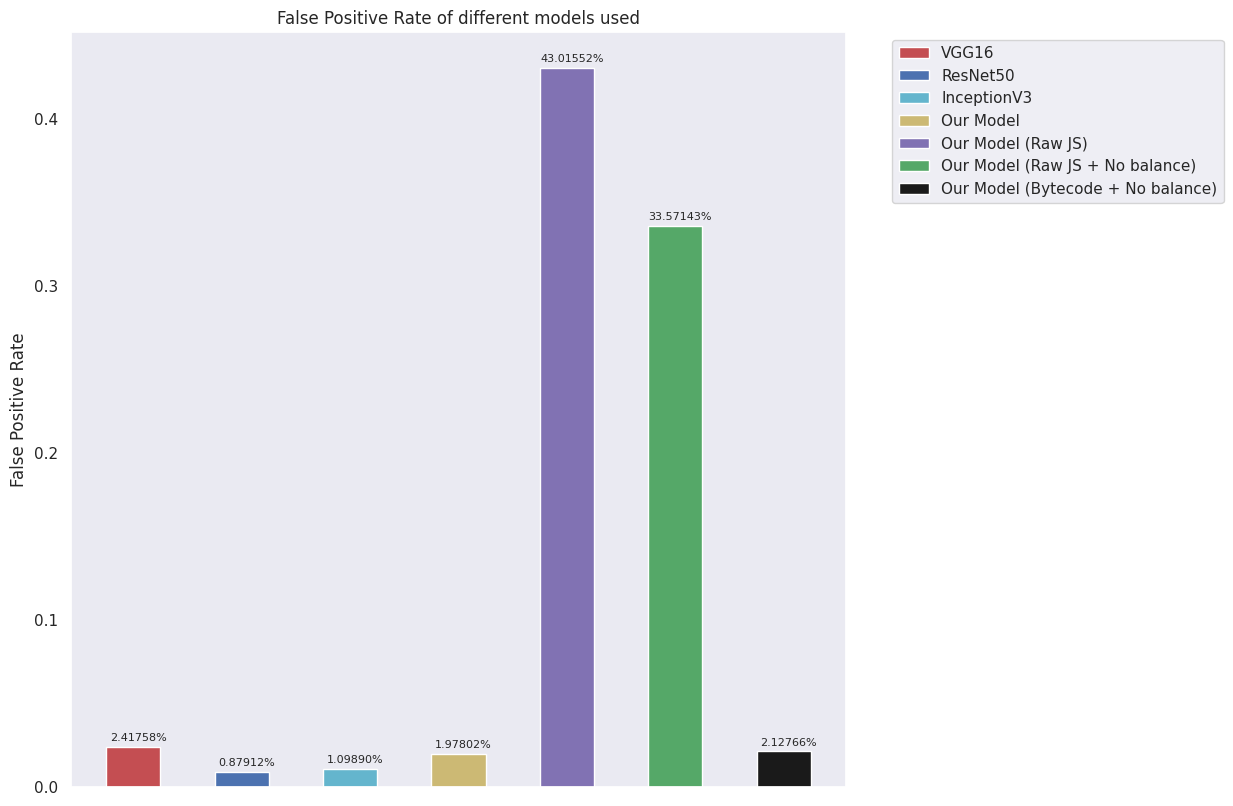

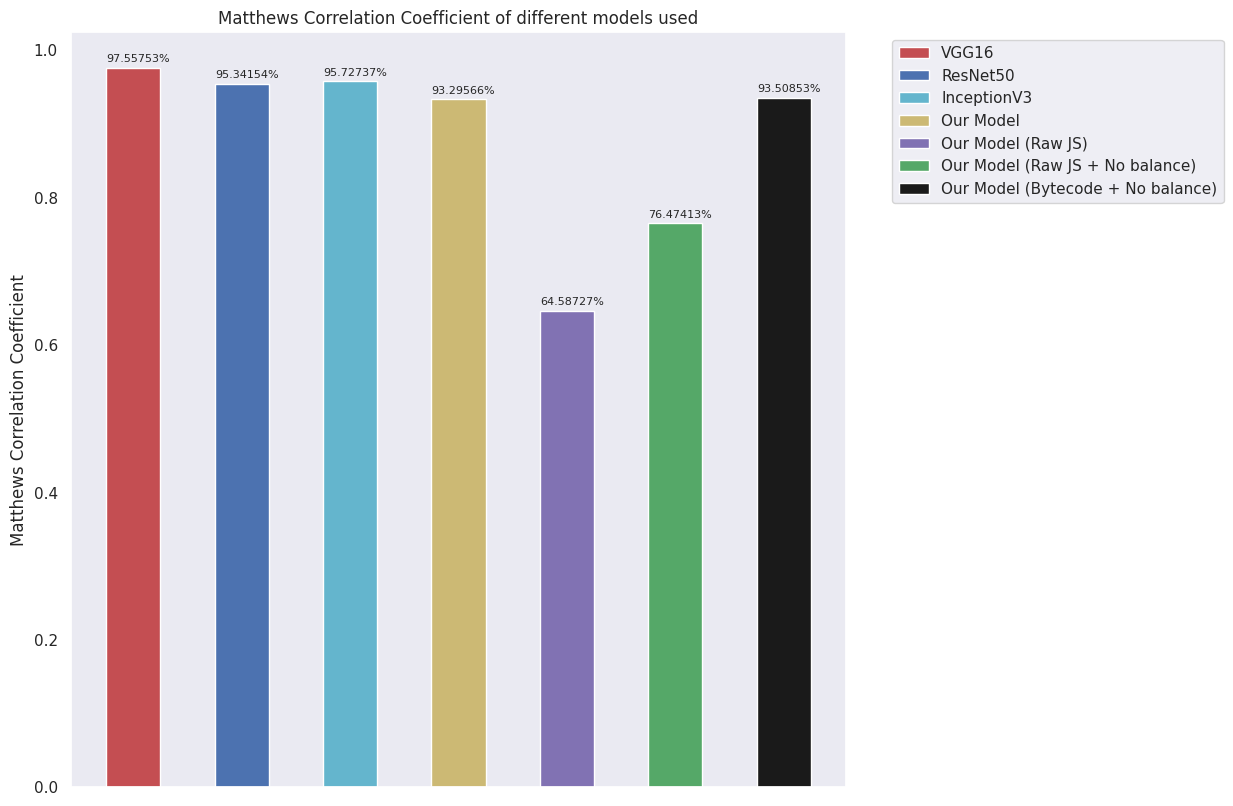

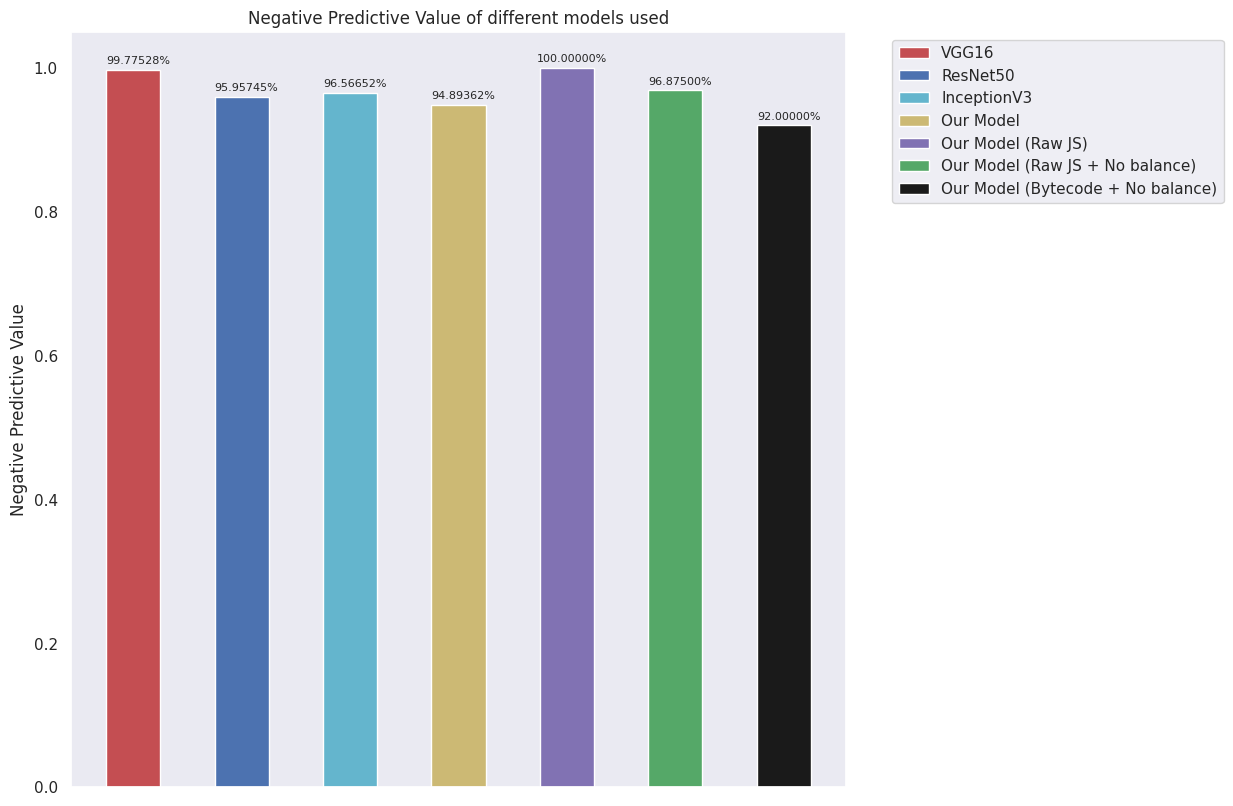

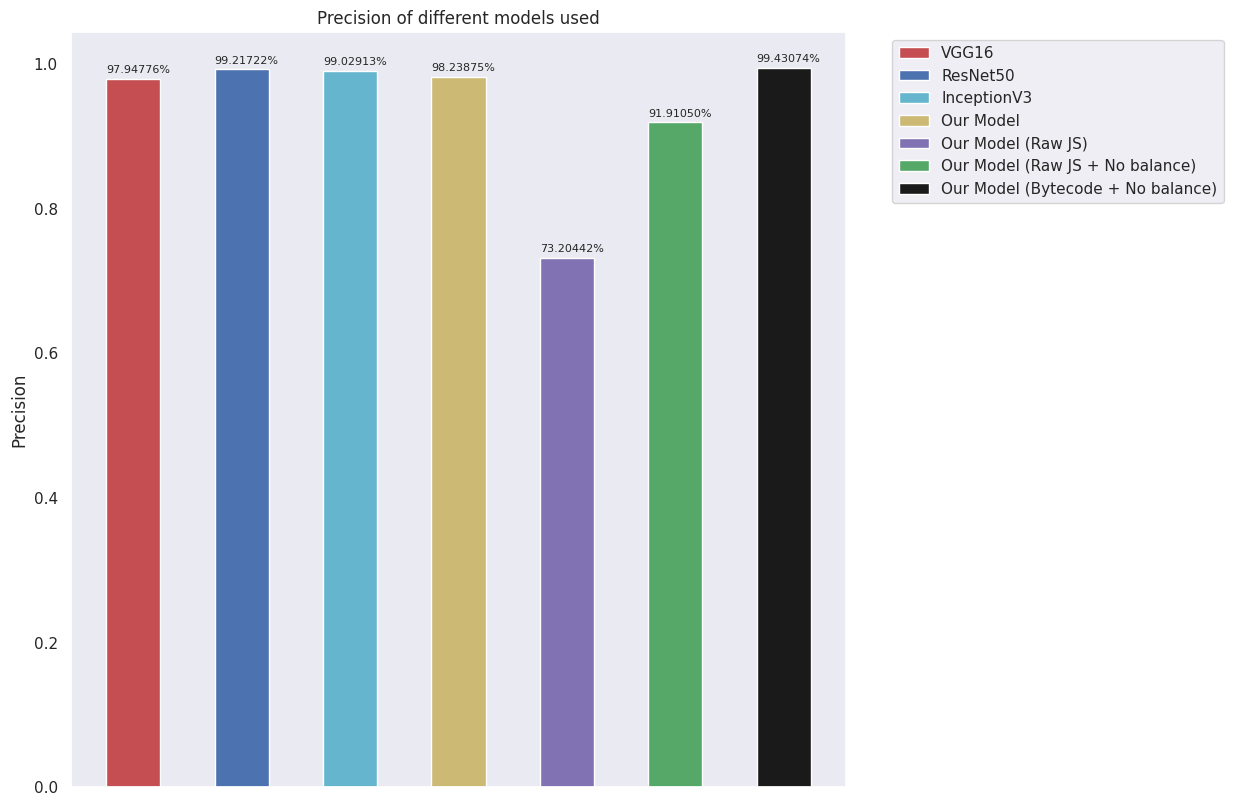

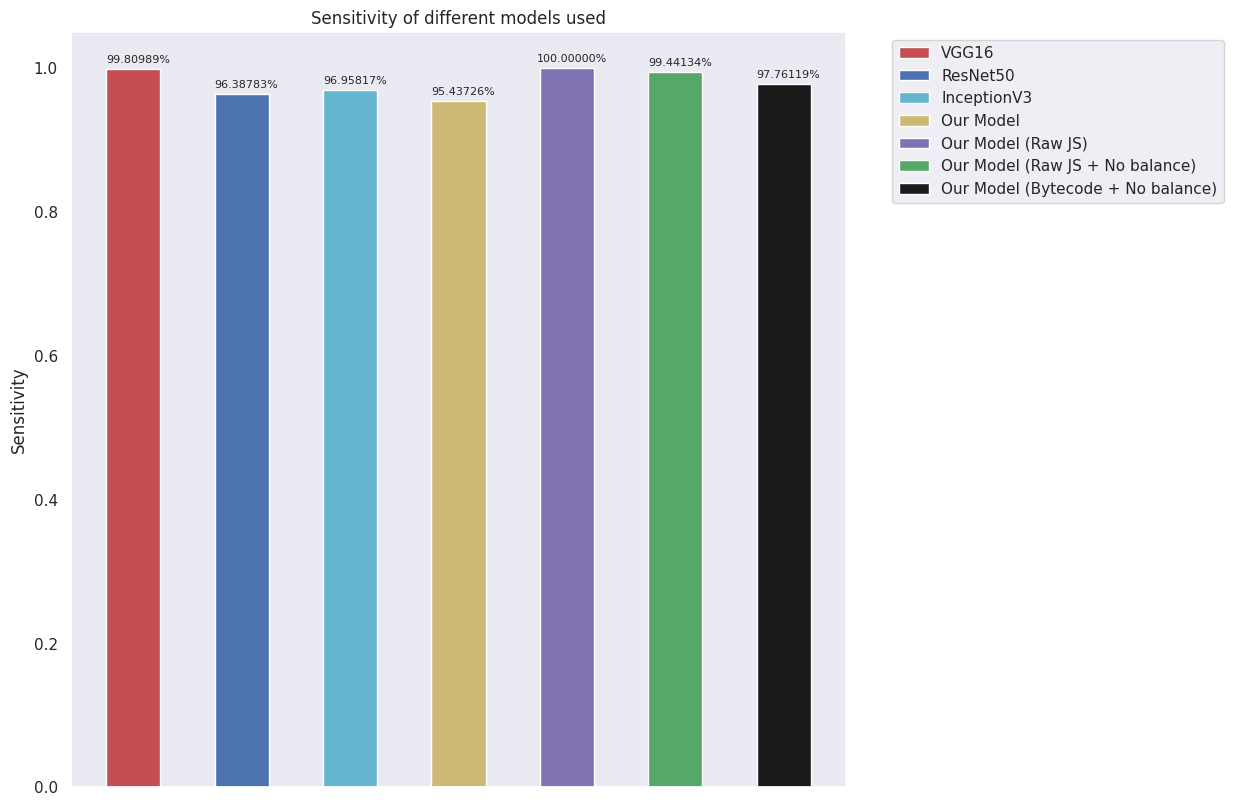

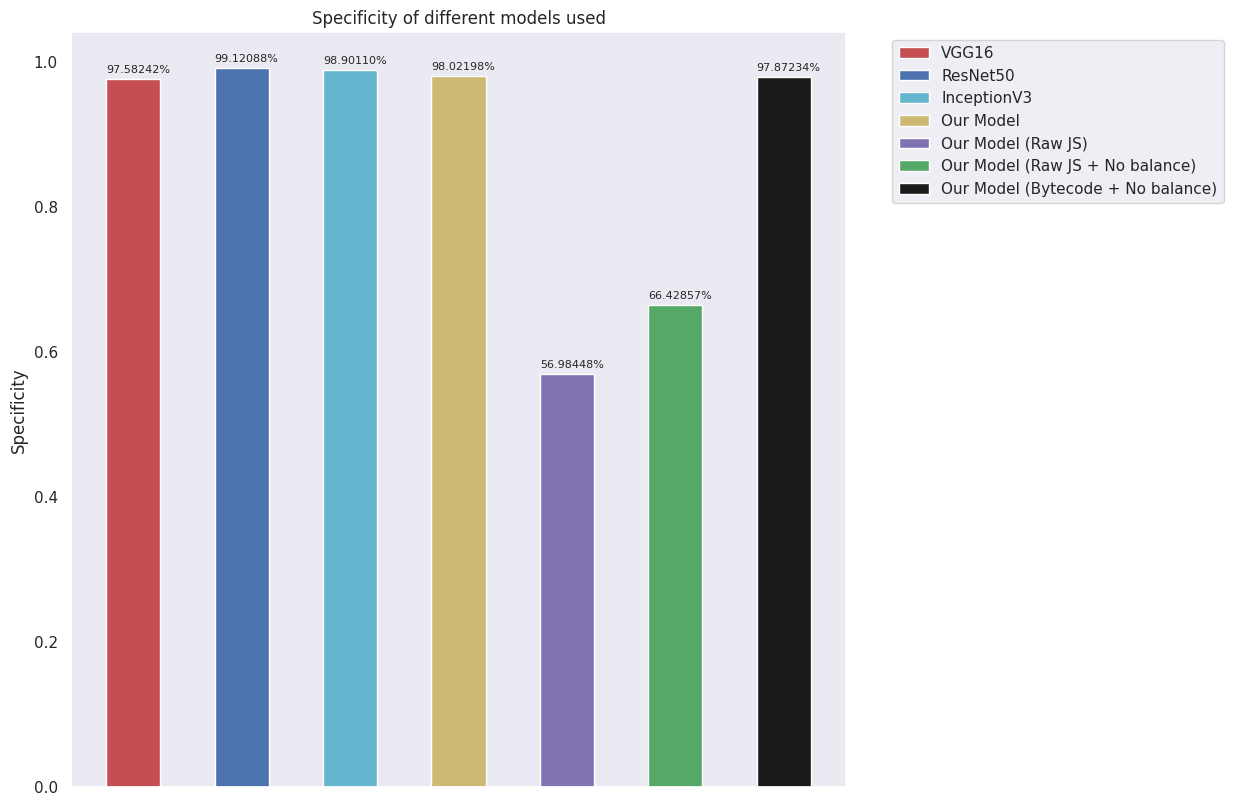

In [22]:
for metric in metrics:
  plot_metrics(all_model_metrics, metric=metric, skips=[], annotate=True, hide_x=True)